Epoch 0: 803.3480923274342
Epoch 1: 257.80478610767074
Epoch 2: 230.2554622732404
Epoch 3: 229.59640425798898
Epoch 4: 229.36856632082214
Epoch 5: 229.14837789921134
Epoch 6: 228.92852666478737
Epoch 7: 228.70955381304785
Epoch 8: 228.4917997634423
Epoch 9: 228.27532406695977
Epoch 10: 228.0601082373014
Epoch 11: 227.84623591436377
Epoch 12: 227.6336225867562
Epoch 13: 227.42231283008482
Epoch 14: 227.2122767357258
Epoch 15: 227.00351649858288
Epoch 16: 226.79599257551067
Epoch 17: 226.5897379274781
Epoch 18: 226.3847598233579
Epoch 19: 226.18099630507442
Epoch 20: 225.9784808835691
Epoch 21: 225.777199489206
Epoch 22: 225.57713871368674
Epoch 23: 225.3782903680133
Epoch 24: 225.18067400698556
Epoch 25: 224.98425051271602
Epoch 26: 224.78902508578128
Epoch 27: 224.59500776510586
Epoch 28: 224.4021554275632
Epoch 29: 224.2105071864504
Epoch 30: 224.0200218915248
Epoch 31: 223.83071407421681
Epoch 32: 223.64256611299325
Epoch 33: 223.45556768741227
Epoch 34: 223.26974357635785
Epoch 35: 

Epoch 281: 200.3710230693013
Epoch 282: 200.33482082181112
Epoch 283: 200.29887379141437
Epoch 284: 200.26321016739573
Epoch 285: 200.2277482563982
Epoch 286: 200.19250862527545
Epoch 287: 200.1575488731422
Epoch 288: 200.12281556473127
Epoch 289: 200.08833595241293
Epoch 290: 200.05406900102594
Epoch 291: 200.02004058244455


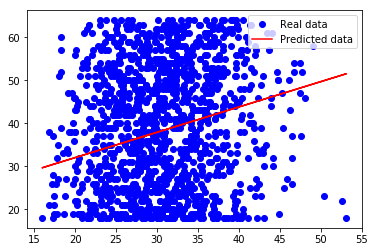

In [3]:
""" Simple linear regression example in TensorFlow
This program tries to predict the number of thefts from 
the number of fire in the city of Chicago
Author: Chip Huyen
Prepared for the class CS 20SI: "TensorFlow for Deep Learning Research"
cs20si.stanford.edu
"""
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import xlrd

import utils

DATA_FILE = 'age_bmi.xls'

# Step 1: read in data from the .xls file
book = xlrd.open_workbook(DATA_FILE, encoding_override="utf-8")
sheet = book.sheet_by_index(0)
data = np.asarray([sheet.row_values(i) for i in range(1, sheet.nrows)])
n_samples = sheet.nrows - 1

# Step 2: create placeholders for input X (number of fire) and label Y (number of theft)
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

# Step 3: create weight and bias, initialized to 0
w = tf.Variable(0.0, name='weights')
b = tf.Variable(0.0, name='bias')

# Step 4: build model to predict Y
Y_predicted = X * w + b 

# Step 5: use the square error as the loss function
loss = tf.square(Y - Y_predicted, name='loss')
# loss = utils.huber_loss(Y, Y_predicted)

# Step 6: using gradient descent with learning rate of 0.01 to minimize loss
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

with tf.Session() as sess:
	# Step 7: initialize the necessary variables, in this case, w and b
    sess.run(tf.global_variables_initializer()) 
	
    writer = tf.summary.FileWriter('./graphs/linear_reg', sess.graph)
	
	# Step 8: train the model
    for i in range(500): # train the model 100 epochs
        total_loss = 0
        for x, y in data:
			# Session runs train_op and fetch values of loss
            _, l = sess.run([optimizer, loss], feed_dict={X: x, Y:y}) 
            total_loss += l
        if total_loss/n_samples < 200:
            break
        print('Epoch {0}: {1}'.format(i, total_loss/n_samples))

	# close the writer when you're done using it
    writer.close() 
	
	# Step 9: output the values of w and b
    w, b = sess.run([w, b]) 

# plot the results
X, Y = data.T[0], data.T[1]
plt.plot(X, Y, 'bo', label='Real data')
plt.plot(X, X * w + b, 'r', label='Predicted data')
plt.legend()
plt.show()